In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data importing**

In [54]:
data=pd.read_csv("C:/Users/palla/Documents/Py files/datasets/netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,2-Mar-19,2016,R,109 min,Dramas
1,s6071,Movie,The Aerial,Esteban Sapir,"Rafael Ferro, Sol Moreno, Jonathan Sandor, Ale...",Argentina,1-Apr-18,2007,TV-MA,99 min,"Dramas, International Movies, Sci-Fi & Fantasy"
2,s7136,Movie,Tom Papa Live in New York City,Rob Zombie,Tom Papa,United States,31-Dec-18,2011,TV-14,57 min,Stand-Up Comedy
3,s5768,Movie,Spookley the Square Pumpkin,Bernie Denk,"Sonja Ball, Craig Francis, Rick Jones, Michel ...",United States,1-Sep-19,2004,G,47 min,Children & Family Movies
4,s1375,Movie,Chronically Metropolitan,Xavier Manrique,"Shiloh Fernandez, Ashley Benson, Josh Peck, Ad...",United States,1-Feb-20,2016,TV-MA,86 min,"Comedies, Dramas, Independent Movies"


In [55]:
data.shape  
#rows,col

(2403, 11)

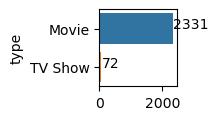

In [56]:
#data['type'].value_counts()

plt.figure(figsize=(1, 1))  
# Adjust the figure size if needed
sns.barplot(x=data['type'].value_counts().values, y=data['type'].value_counts().index)
plt.ylabel('type')

# Adding annotations for y-labels
for index, value in enumerate(data['type'].value_counts().values):
    plt.text(value, index, str(value))

plt.show()

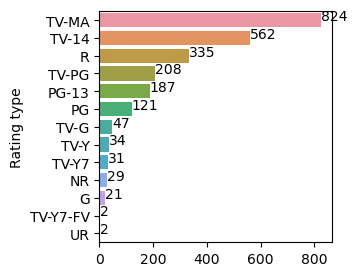

In [57]:
#data['rating'].value_counts()

plt.figure(figsize=(3, 3))  
# Adjust the figure size if needed
sns.barplot(x=data['rating'].value_counts().values, y=data['rating'].value_counts().index)
plt.ylabel('Rating type')

# Adding annotations for y-labels
for index, value in enumerate(data['rating'].value_counts().values):
    plt.text(value, index, str(value))
plt.show()

In [58]:
#checking NA cells
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Empty values present in **director, cast, country, date_added, rating columns**


In [59]:
data['director'].value_counts()

Raúl Campos, Jan Suter                             11
Martin Scorsese                                     9
Jay Karas                                           8
Cathy Garcia-Molina                                 7
Robert Rodriguez                                    6
                                                   ..
Sridhar Jetty                                       1
Karan Shivajirao Chavan, Vikram Tanajirao Patil     1
Wouter Bouvijn                                      1
Guy Vasilovich                                      1
David Lean                                          1
Name: director, Length: 2004, dtype: int64

# Removing the unnecessary columns

In [60]:
data=data[['title','director','cast','country','rating','listed_in','type']]
data.head()

,title,director,cast,country,rating,listed_in,type
0,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,R,Dramas,Movie
1,The Aerial,Esteban Sapir,"Rafael Ferro, Sol Moreno, Jonathan Sandor, Ale...",Argentina,TV-MA,"Dramas, International Movies, Sci-Fi & Fantasy",Movie
2,Tom Papa Live in New York City,Rob Zombie,Tom Papa,United States,TV-14,Stand-Up Comedy,Movie
3,Spookley the Square Pumpkin,Bernie Denk,"Sonja Ball, Craig Francis, Rick Jones, Michel ...",United States,G,Children & Family Movies,Movie
4,Chronically Metropolitan,Xavier Manrique,"Shiloh Fernandez, Ashley Benson, Josh Peck, Ad...",United States,TV-MA,"Comedies, Dramas, Independent Movies",Movie


We kept the **title, director, cast, country, rating and listed_in columns** in our dataset and removed the others

 # Creating Binary matrix

Spliting for **Cast** columns

In [61]:
import re

actors = []  #actors empty list created
flat_list=[] #flat list empty list 

for i in data['cast']:
    actor = re.split(r', \s*', i)
    #splitting content of the 'cast' element into a list of individual actors
    actors.append(actor)
        #All the names of the actors are added to the 'actors' list

for a in actors:
    for item in a:
        flat_list.append(item)
        #Appending the list of all the actors name in a singluar list 'flat_list'

actors_list=set(flat_list)
actors_list=sorted(actors_list)


Creating the Binary Matrix: **Cast** columns

In [62]:
binary_actors = []

for i in data['cast']:
    bin_act = [1.0 if abc in i else 0.0 for abc in actors_list]
    binary_actors.append(bin_act)
#it creates a binary list where each element indicates whether an actor is present in the movie's cast or not

binary_actors_df=pd.DataFrame(binary_actors,columns=actors_list)
#The dataframe consists of the binary list with respect to the unique actor's name from the actor_list

Spliting for **director** columns

In [63]:
direct = []  #Director empty list created
flat_list=[] #flat list empty list 

for i in data['director']:
    dirc = re.split(r', \s*', i)
    #splitting content of the 'director' element into a list of individual directors
    direct.append(dirc)
        #All the names of the directors are added to the 'Director' list

for b in direct:
    for item in b:
        flat_list.append(item)
        #Appending the list of all the directors name in a singluar list 'flat_list'

director_list=set(flat_list)
director_list=sorted(actors_list)


Creating the Binary Matrix: **Director** columns

In [64]:
binary_directors = []

for i in data['director']:
    bin_dir = [1.0 if abc in i else 0.0 for abc in director_list]
    binary_directors.append(bin_dir)
#it creates a binary list where each element indicates whether an actor is present in the movie's cast or not

binary_directors_df=pd.DataFrame(binary_directors,columns=director_list)
#The dataframe consists of the binary list with respect to the unique actor's name from the actor_list

Spliting for **country** columns

In [65]:
conty = []  #Country empty list created
flat_list=[] #flat list empty list 

for i in data['country']:
    con = re.split(r', \s*', i)
    #splitting content of the 'country' element into a list of individual countries
    conty.append(con)
        #All the names of the countries are added to the 'Conty' list

for c in conty:
    for item in c:
        flat_list.append(item)
        #Appending the list of all the countries name in a singluar list 'flat_list'

country_list=set(flat_list)
country_list=sorted(country_list)

Creating the Binary Matrix: **country** columns

In [66]:
binary_country = []

for i in data['country']:
    bin_con = [1.0 if abc in i else 0.0 for abc in country_list]
    binary_country.append(bin_con)
#it creates a binary list where each element indicates whether a country is present in the movie's country or not

binary_country_df=pd.DataFrame(binary_country,columns=country_list)
#The dataframe consists of the binary list with respect to the unique country's name from the country_list

Spliting for **listed_in** columns

In [67]:
genre = []  #Genre empty list created
flat_list=[] #flat list empty list 

for i in data['listed_in']:
    gen = re.split(r', \s*', i)
    #splitting content of the 'listed_in' element into a list of individual Genres
    genre.append(gen)
        #All the names of the Genres are added to the 'genre' list

for d in genre:
    for item in d:
        flat_list.append(item)
        #Appending the list of all the countries name in a singluar list 'flat_list'

genre_list=set(flat_list)
genre_list=sorted(genre_list)

Creating the Binary Matrix: **Movies** dataset - **listed_in** columns

In [68]:
binary_genre = []

for i in data['listed_in']:
    bin_gen = [1.0 if abc in i else 0.0 for abc in genre_list]
    binary_genre.append(bin_gen)
#it creates a binary list where each element indicates whether a genre is present in the movie's listed_in or not

binary_genre_df=pd.DataFrame(binary_genre,columns=genre_list)
#The dataframe consists of the binary list with respect to the unique country's name from the country_list

Spliting for **rating** columns

In [69]:
rat = []  #Ratings empty list created
flat_list=[] #flat list empty list 

#data['rating'] = str(data['rating'])
#converting float to string

for i in data['rating']:
    rate = re.split(r', \s*', i)
    #splitting content of the 'rating' element into a list of individual Ratings
    rat.append(rate)
        #All the rating types are added to the 'rat' list

for e in rat:
    for item in e:
        flat_list.append(item)
        #Appending the list of all the ratings in a singluar list 'flat_list'

rating_list=set(flat_list)
rating_list=sorted(rating_list)

Creating the Binary Matrix: **rating** columns

In [70]:
binary_rating = []

for i in data['rating']:
    bin_rat = [1.0 if abc in i else 0.0 for abc in rating_list]
    binary_rating.append(bin_rat)
#it creates a binary list where each element indicates whether the rating is present in the movie's ratings or not

binary_rating_df=pd.DataFrame(binary_rating,columns=rating_list)
#The dataframe consists of the binary list with respect to the unique ratings from the rating_list

# ***Concatenation***

In [71]:
binary1=pd.concat([binary_actors_df, binary_directors_df, binary_country_df, binary_genre_df, binary_rating_df],axis=1,ignore_index=True)
binary1

,0,1,2,3,4,5,6,7,8,9,...,27473,27474,27475,27476,27477,27478,27479,27480,27481,27482
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation system

In [98]:
import numpy as np

def recommender(search):
    
    cs_list = []  #cosine similarity values empty list
    binary_list = []  #to hold temporarily binary values
    
    if search in data['title'].values:
        idx = data[data['title'] == search].index.item()
        #if the search exists in the dataset, this line finds the index of the row where the title matches the search title in the 'movies' DataFrame

        for i in binary1.iloc[idx]:
            binary_list.append(i)
            
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        #convert the binary_list into a 1D NumPy array called point1. The .reshape(1, -1) ensures that it is a row vector. 
        
        for j in range(len(data)):
            binary_list2 = []
            for k in binary1.iloc[j]:
                binary_list2.append(k)
                
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
        #convert the binary_list into a 1D NumPy array called point2
        
            dot_product = np.dot(point1, point2)
        #calculates the dot product for point1 and point2 arrays
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
        #calculates the Euclidean norm of point1 and point2.
            cos_sim = dot_product / (norm_1 * norm_2)
        #cosine similarity is calculated
            cs_list.append(cos_sim)
            
        movies_copy = data.copy()
        movies_copy['cos_sim'] = cs_list
        #new column 'cos_sim' is added, containing calculated cosine similarity values
        
        results = movies_copy.sort_values('cos_sim', ascending=False)
        #results = movies_copy
        results = results[results['title'] != search] 
        #filters out the row with the value of search parameter amongst the title

        #top 5 rows represent the movies with the highest cosine similarity values
        return(results.head(5))
 
    else:
        return ( f"{search} not present in dataset")

In [99]:
recommender("21")

'21 not present in dataset'

In [74]:
recommender("23:59")

,title,director,cast,country,rating,listed_in,type,cos_sim
991,Old Lord Savanna,André D'Elia,Leonardo Ribeiro,Brazil,TV-14,"Documentaries, International Movies",Movie,0.292770
147,Revenge of the Pontianak,"Glen Goei, Gavin Yap","Nur Fazura, Remy Ishak, Hisyam Hamid, Shenty F...","Singapore, Malaysia",TV-14,"Horror Movies, International Movies",Movie,0.286446
723,Daemonium,Pablo Parés,"Walter Cornás, Dany Casco, Caro Angus, Rocío R...",Argentina,NR,"Action & Adventure, Horror Movies, Internation...",Movie,0.276026
1265,André & his olive tree,Josiah Ng,André Chiang,Singapore,TV-PG,"Documentaries, International Movies",Movie,0.273861
1779,The Binding,Domenico de Feudis,"Riccardo Scamarcio, Mía Maestro",Italy,TV-MA,"Horror Movies, International Movies, Thrillers",Movie,0.273861


In [75]:
recommender("The Flash")

,title,director,cast,country,rating,listed_in,type,cos_sim
124,Brave Miss World,Cecilia Peck,Linor Abargil,"United States, Israel, Italy, South Africa",TV-14,"Crime TV Shows, Docuseries",TV Show,0.305888
117,Arrow,James Bamford,"Stephen Amell, Katie Cassidy, David Ramsey, Wi...",United States,TV-14,"Crime TV Shows, TV Action & Adventure",TV Show,0.280976
999,Halo: The Fall of Reach,Ian Kirby,"Jen Taylor, Steve Downes, Michelle Lukes, Brit...",United States,TV-14,"Action & Adventure, Sci-Fi & Fantasy",Movie,0.264906
354,IO,Jonathan Helpert,"Margaret Qualley, Anthony Mackie, Danny Huston",United States,TV-14,"Dramas, Sci-Fi & Fantasy",Movie,0.260133
1045,Spectral,Nic Mathieu,"James Badge Dale, Emily Mortimer, Bruce Greenw...","United States, Hungary",TV-14,"Action & Adventure, Sci-Fi & Fantasy",Movie,0.236940
